<a href="https://colab.research.google.com/github/jacksonnunesds/Data-cleaning-warangling-with-python/blob/main/Data_cleaning_wrangling_Beauty_Co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.0 O Entendimento do Negocio**

##**1.1 Apresentação**
A Beauty Co, uma loja online de cosméticos, contratou seus serviços de
verificar as marcas mais vendidas e quais eventos mais ocorrem em
seu site.
O gerente de vendas te passou uma base com o histórico de
interações no site referente ao período entre nov de 2019.

##**1.2 Objetivo**
● Tratar o dataset (Data cleaning/Wrangling)

● Eventos ordenados que mais ocorrem no site (Gráfico)

● Quais são as 5 marcas mais vendidas (Gráfico)

##**1.3 Dicionário dos dados**
Breve descrição das features disponíveis no dataset:

**event_time** - Horário em que o evento aconteceu.

**event_type** - Tipo do evento que ocorreu

**product_id** - ID do Produto.

**category_id** - ID da categoria* do Produto.

**category_code** - Taxonomia da categoria* do produto (codinome). Presente
para categorias significativas (normalmente), mas ignorado para alguns tipos
de acessórios

**brand** - Marca do Produto.



#2.0 A Coleta dos dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Carregando o dataset
df = pd.read_csv('/content/2019-Nov.csv')

In [4]:
# Verificando as informações do dataset
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [ ]:
#O Float mostrará 5 casas decimais a mais
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:

df.describe(include=object)

,event_time,event_type,category_code,brand,user_session
count,62240,62240,1013,37770,62200
unique,29217,4,10,209,14886
top,2019-11-01 02:47:17 UTC,view,appliances.environment.vacuum,irisk,674f36f4-5495-4a50-9b16-6688e8793694
freq,149,28702,340,4188,534


In [ ]:
# Verificando as dimensões do dataset
df.shape

(3046385, 9)

#**3.0 A Limpeza de Dados**


In [6]:
#verificando o tipo dos dados
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [ ]:
df['event_type'].unique()

Nesta primeira consulta de duplicadas, podemos ver que temos um total de 246693

In [ ]:
df.duplicated().sum()

In [ ]:
# Agrupar valores (user_session, event_type, product_id, event_time por user_session) para verificar se existem valores duplicados
df.groupby(by=['user_session', 'event_type', 'product_id', 'event_time'])['user_session'].count().sort_values(ascending=False)

In [ ]:
# Aplicando o tratamento das duplicadas
df[['user_session', 'event_type', 'product_id', 'event_time']].drop_duplicates().shape

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

Podemos verificar que não temos mais duplicadas

In [ ]:
# Verificando duplicadas apos tratamento
df.duplicated().sum()

In [ ]:
# Verificando os dados nulos
df.isnull().sum()

event_time             0
event_type             1
product_id             1
category_id            1
category_code    2996002
brand            1307015
price                  1
user_id                1
user_session         586
dtype: int64

Agora vamos fazer o tratamento da feature event_time, que está no formato object, vamos converter para datetime, para facilitar em futuras consultas.

In [7]:
# utilizado para alterar o formato de object para datetime
df['event_time']= pd.to_datetime(df['event_time'], format= '%Y-%m-%d %H:%M:%S UTC')

In [8]:
# Agora o fomato está correto
df.dtypes

event_time       datetime64[ns]
event_type               object
product_id                int64
category_id               int64
category_code            object
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

tratamento da feature brand 'marcas'

In [ ]:
df['brand'].value_counts()

In [ ]:
df['brand'].isna().value_counts()

In [ ]:
df.dropna(subset=['brand'], inplace=True)

In [ ]:
df['brand'].isna().value_counts()

Tratamento de nulos da feature Price

In [ ]:
df['price'].isna().value_counts()

In [9]:
# Calculando Quartis
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.99])

,product_id,category_id,price,user_id
count,6.224000e+04,6.224000e+04,62240.000000,6.224000e+04
mean,5.463414e+06,1.544921e+18,8.638495,5.043103e+08
std,1.346801e+06,1.580073e+17,20.056535,8.202991e+07
min,3.762000e+03,1.487580e+18,0.000000,1.311745e+07
1%,4.940390e+03,1.487580e+18,0.290000,2.316694e+08
10%,5.609124e+06,1.487580e+18,0.950000,3.926692e+08
25%,5.724665e+06,1.487580e+18,2.050000,4.734972e+08
50%,5.811691e+06,1.487580e+18,3.970000,5.392629e+08
75%,5.857360e+06,1.487580e+18,7.140000,5.651090e+08
99%,5.900597e+06,2.151191e+18,95.177600,5.664610e+08


Vamos calcular o IQR para ajudar no tratamento. 
IQR = Q3-Q1

In [10]:
Q3 = df['price'].quantile(0.75)
Q1 = df['price'].quantile(0.25)
IQR = Q3-Q1
IQR

5.09

In [11]:
lower_bound = Q1 - 1.5*IQR
lower_bound

-5.585

In [12]:
upper_bound = Q3 + 1.5*IQR
upper_bound

14.774999999999999

Verificando nulos event_type

In [13]:
df['event_type'].isna().value_counts()

False    62240
Name: event_type, dtype: int64

In [14]:
x = df['event_type'].value_counts().index
x

Index(['view', 'cart', 'remove_from_cart', 'purchase'], dtype='object')

In [15]:
y = df['event_type'].value_counts()
y

view                28702
cart                16541
remove_from_cart    12871
purchase             4126
Name: event_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


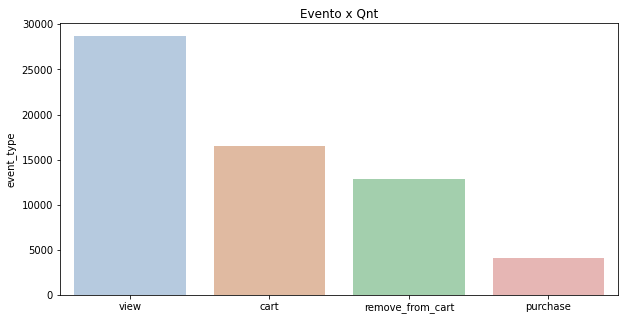

In [16]:
# Plotando os maiores tipos de eventos do site
plt.figure(figsize=(10,5))
plt.title('Evento x Qnt')
sns.barplot(x, y, saturation= 0.5, order=[ 'view', 'cart','remove_from_cart', 'purchase'], palette= 'pastel')

Verificando quais foram os itens mais vendidos

In [17]:
mais_vendidas = df['brand'].value_counts()[0:5]
mais_vendidas

irisk       4188
runail      4100
masura      3746
grattol     2161
ingarden    1434
Name: brand, dtype: int64

In [18]:
mais_vendidas = pd.DataFrame(mais_vendidas).reset_index()

In [19]:
mais_vendidas.head()

,index,brand
0,irisk,4188
1,runail,4100
2,masura,3746
3,grattol,2161
4,ingarden,1434


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


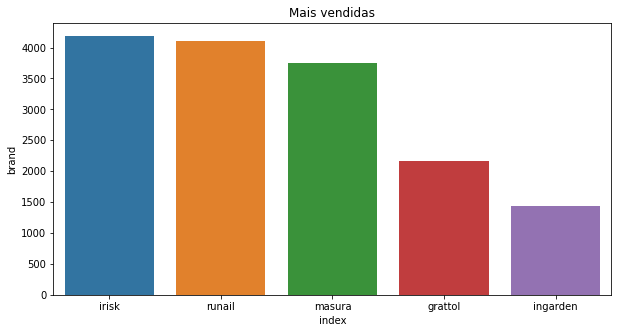

In [20]:
# Plotando brands 'marcas' mais vendidas

plt.figure(figsize=(10,5))
plt.title('Mais vendidas')
sns.barplot('index', 'brand', data= mais_vendidas)